In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
import sklearn
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ObesityFullUsedSet.csv')

In [3]:
df.head()

,Year Period,N,Ov,Ob,NM,OvM,ObM,NF,OvF,ObF,...,Ob100,N200,Ov200,Ob200,N300,Ov300,Ob300,N400,Ov400,Ob400
0,1,41.6,33.1,22.9,37.9,40.7,20.2,45.0,25.9,25.5,...,34.7,39.3,31.9,26.1,41.8,33.3,22.7,45.5,33.7,18.7
1,2,33.0,34.7,30.4,30.2,41.3,27.5,35.7,28.4,33.2,...,33.7,30.5,33.2,34.1,29.6,36.5,32.1,36.5,36.7,25.5
2,3,32.3,34.6,31.4,28.3,41.0,29.5,36.1,28.4,33.2,...,35.0,31.9,32.6,33.6,29.4,35.5,33.3,35.1,36.4,27.3
3,4,31.6,33.3,33.4,26.6,39.7,32.4,36.5,27.0,34.3,...,27.8,31.3,30.6,35.9,29.7,33.3,35.7,33.7,45.4,28.9
4,5,30.8,33.5,34.0,26.1,40.2,32.7,35.2,27.1,35.4,...,35.9,28.3,31.6,38.0,30.0,33.0,35.7,33.5,35.3,29.4


In [4]:
df.describe()

,Year Period,N,Ov,Ob,NM,OvM,ObM,NF,OvF,ObF,...,Ob100,N200,Ov200,Ob200,N300,Ov300,Ob300,N400,Ov400,Ob400
count,10.00000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000,10.000000,10.000000,10.000000
mean,5.50000,31.130000,33.300000,33.840000,27.37000,39.280000,32.260000,34.710000,27.600000,35.330000,...,36.800000,28.980000,31.660000,37.320000,29.830000,32.930000,35.7000,34.100000,35.600000,29.330000
std,3.02765,4.242392,1.004435,4.993596,4.23951,1.675841,5.554018,4.319581,0.929755,4.493217,...,4.573353,4.524206,1.112754,5.240399,4.607494,1.889768,5.7038,4.650448,4.292888,5.153435
min,1.00000,26.000000,31.400000,22.900000,22.50000,35.900000,20.200000,29.400000,25.900000,25.500000,...,27.800000,24.400000,29.800000,26.100000,24.600000,30.500000,22.7000,27.600000,29.100000,18.700000
25%,3.25000,29.075000,33.100000,31.900000,25.77500,38.350000,30.225000,31.975000,27.025000,33.475000,...,34.775000,25.675000,30.925000,34.550000,27.975000,31.425000,33.9000,32.025000,33.775000,27.700000
50%,5.50000,30.300000,33.350000,34.350000,26.15000,39.550000,33.300000,34.450000,27.700000,35.450000,...,36.550000,27.950000,31.600000,37.650000,29.650000,32.900000,36.2500,33.450000,35.850000,29.550000
75%,7.75000,32.125000,33.725000,36.125000,27.87500,40.575000,34.575000,36.000000,28.400000,37.550000,...,38.975000,31.100000,32.425000,41.975000,29.925000,33.300000,38.3500,34.750000,36.700000,31.025000
max,10.00000,41.600000,34.700000,41.100000,37.90000,41.300000,40.500000,45.000000,28.700000,41.500000,...,44.000000,39.300000,33.200000,42.800000,41.800000,36.500000,43.3000,45.500000,45.400000,38.300000


Text(0, 0.5, 'correlation')

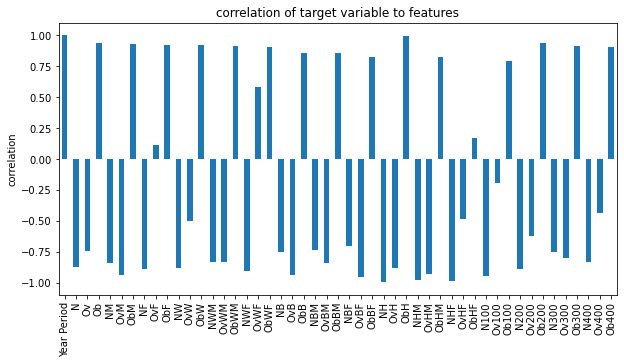

In [5]:
plt.figure(figsize=(10,5))
ax = df.corr()['Year Period'].plot(kind='bar',title='correlation of target variable to features')
ax.set_ylabel('correlation')

<AxesSubplot:title={'center':'Correlation plot'}>

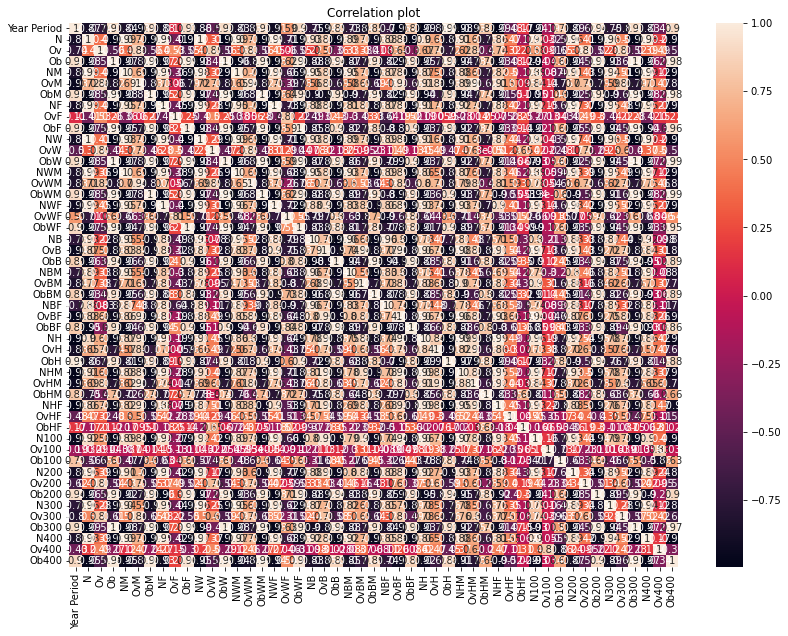

In [6]:
plt.figure(figsize=(30,10));plt.subplot(121,title = 'Correlation plot')
sns.heatmap(df.corr(),annot=True)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [8]:
X = df.drop(columns=['Year Period'],axis=1) 
y = df.drop(columns=['N', 'Ov', 'Ob', 'NM', 'NF', 'OvM', 'OvF', 'ObM', 'ObF', 'NW', 'OvW', 'ObW', 'NWM', 'OvWM', 'ObWM', 'NWF', 'OvWF', 'ObWF', 'NB', 'OvB', 'ObB', 'NBM', 'OvBM', 'ObBM', 'NBF', 'OvBF', 'ObBF', 'NH', 'OvH', 'ObH', 'NHM', 'OvHM', 'ObHM', 'NHF', 'OvHF', 'ObHF', 'N100', 'Ov100', 'Ob100', 'N200', 'Ov200', 'Ob200', 'N300', 'Ov300', 'Ob300', 'N400', 'Ov400', 'Ob400'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=40)

In [9]:
lr = LogisticRegression(multi_class='ovr', max_iter=250, C=0.8, random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(C=0.8, max_iter=250, multi_class='ovr', random_state=40)

In [10]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('Accuracy in Train set   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  set   : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy in Train set   : 1.00
Accuracy in Test  set   : 0.00


In [11]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
regr_1 = DecisionTreeRegressor(max_depth=40, random_state=15)
regr_2 = DecisionTreeRegressor(max_depth=50, random_state=15)

In [62]:
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=50, random_state=15)

In [63]:
train_accuracy2 = regr_1.score(X_train, y_train)
train_accuracy3 = regr_2.score(X_train, y_train)
test_accuracy2 = regr_1.score(X_test, y_test)
test_accuracy3 = regr_2.score(X_test, y_test)
print('Accuracy in depth_2 Train set   : {:.2f}'.format(train_accuracy2), 
      'Accuracy in depth_5 Train set   : {:.2f}'.format(train_accuracy3), sep='\n')
print('Accuracy in depth_2 Test  set   : {:.2f}'.format(test_accuracy2), 
      'Accuracy in depth_5 Test  set   : {:.2f}'.format(test_accuracy3), sep='\n')

Accuracy in depth_2 Train set   : 1.00
Accuracy in depth_5 Train set   : 1.00
Accuracy in depth_2 Test  set   : 0.79
Accuracy in depth_5 Test  set   : 0.79


In [15]:
from sklearn.kernel_ridge import KernelRidge

In [16]:
krr = KernelRidge(alpha=1.5)
krr.fit(X_train, y_train)

KernelRidge(alpha=1.5)

In [17]:
train_accuracy4 = krr.score(X_train, y_train)
test_accuracy4 = krr.score(X_test, y_test)
print('Accuracy in Train set   : {:.2f}'.format(train_accuracy4), 
      'Accuracy in Test  set   : {:.2f}'.format(test_accuracy4), sep='\n')

Accuracy in Train set   : 1.00
Accuracy in Test  set   : 0.94


In [18]:
with open('model-v1.joblib', 'wb') as f:
    joblib.dump(krr, f)

In [64]:
X = df.drop(columns=['Year Period','NM', 'NF', 'OvM', 'OvF', 'ObM', 'ObF', 'NW', 'OvW', 'ObW', 'NWM', 'OvWM', 'ObWM', 'NWF', 'OvWF', 'ObWF', 'NB', 'OvB', 'ObB', 'NBM', 'OvBM', 'ObBM', 'NBF', 'OvBF', 'ObBF', 'NH', 'OvH', 'ObH', 'NHM', 'OvHM', 'ObHM', 'NHF', 'OvHF', 'ObHF', 'N100', 'Ov100', 'Ob100', 'N200', 'Ov200', 'Ob200', 'N300', 'Ov300', 'Ob300', 'N400', 'Ov400', 'Ob400'],axis=1) 
y = df.drop(columns=['N', 'Ov', 'Ob', 'NM', 'NF', 'OvM', 'OvF', 'ObM', 'ObF', 'NW', 'OvW', 'ObW', 'NWM', 'OvWM', 'ObWM', 'NWF', 'OvWF', 'ObWF', 'NB', 'OvB', 'ObB', 'NBM', 'OvBM', 'ObBM', 'NBF', 'OvBF', 'ObBF', 'NH', 'OvH', 'ObH', 'NHM', 'OvHM', 'ObHM', 'NHF', 'OvHF', 'ObHF', 'N100', 'Ov100', 'Ob100', 'N200', 'Ov200', 'Ob200', 'N300', 'Ov300', 'Ob300', 'N400', 'Ov400', 'Ob400'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=40)

In [65]:
lr = LogisticRegression(multi_class='ovr', max_iter=250, C=0.8, random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(C=0.8, max_iter=250, multi_class='ovr', random_state=40)

In [66]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('Accuracy in Train set   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  set   : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy in Train set   : 0.71
Accuracy in Test  set   : 0.00


In [74]:
regr_1 = DecisionTreeRegressor(max_depth=40, random_state=25)
regr_2 = DecisionTreeRegressor(max_depth=50, random_state=25)

In [75]:
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=50, random_state=25)

In [76]:
train_accuracy2 = regr_1.score(X_train, y_train)
train_accuracy3 = regr_2.score(X_train, y_train)
test_accuracy2 = regr_1.score(X_test, y_test)
test_accuracy3 = regr_2.score(X_test, y_test)
print('Accuracy in depth_2 Train set   : {:.2f}'.format(train_accuracy2), 
      'Accuracy in depth_5 Train set   : {:.2f}'.format(train_accuracy3), sep='\n')
print('Accuracy in depth_2 Test  set   : {:.2f}'.format(test_accuracy2), 
      'Accuracy in depth_5 Test  set   : {:.2f}'.format(test_accuracy3), sep='\n')

Accuracy in depth_2 Train set   : 1.00
Accuracy in depth_5 Train set   : 1.00
Accuracy in depth_2 Test  set   : 0.79
Accuracy in depth_5 Test  set   : 0.79


In [83]:
krr = KernelRidge(alpha=1.25)
krr.fit(X_train, y_train)

KernelRidge(alpha=1.25)

In [84]:
train_accuracy4 = krr.score(X_train, y_train)
test_accuracy4 = krr.score(X_test, y_test)
print('Accuracy in Train set   : {:.2f}'.format(train_accuracy4), 
      'Accuracy in Test  set   : {:.2f}'.format(test_accuracy4), sep='\n')

Accuracy in Train set   : 0.95
Accuracy in Test  set   : 0.81


In [85]:
with open('model-v1.joblib', 'wb') as f:
    joblib.dump(krr, f)